# 코로나19의 전염 시뮬레이션 구현 


문서이력
* 작성자: 강병철 (bckang at d-if dot kr)
* (2020-03-21) Nesse와 Hubbs의 자료를 근간으로 시뮬레이션 모형을 구현하였습니다.
* (2020-03-22) 코로나19의 전염성에 대한 사회적 거리두기 SEIR 모델 코드를 공유합니다.
* (2020-03-23) 초록을 보완했습니다.

배경
* 코로나19의 방역을 위해서 사회적 거리 두기를 강하게 권장하고 있습니다.
* 사회적 거리 두기가 어느정도의 방역 효과를 가지는지 모형을 통해서 평가합니다.

내용
* SEIR 모형에 대한 개요를 소개합니다(Nesse 자료 참고).
* 사회적 거리 두기 모형 구현을 위해서 간략화된 SEIR 모형을 정리했습니다(Hubbs 자료 중심).
* 매개 변수를 조사해서 정리했습니다(Hubbs 자료 중심).
* 모형의 개요
 * 인구 N = 10,000 명
 * 인구 유입과 유출은 없음 (섬과 같은 상황)
 * 잠복 기간의 역수 $\alpha = \frac{1}{t_{incubation}} = 0.2$
 * 인구의 평균 접촉 속도 $\beta = 1.75$
 * 평균 감염 기간의 역수 $\gamma = \frac{1}{t_{infectious}} = 0.5$
 * 사회적 거리 두기 $\rho = 0.8$
* 불필요한 오해가 없도록 실제 특정 국가를 상정하지 않고, 사회적 거리 두기의 상대적 효과만 보았습니다.
* 간단한 모형으로 감염병의 전파 시뮬레이션을 코로나19에 적용했습니다.

토론
* 20% 정도의 사회적 거리 두기($\rho$=0.8)가 성공해도 방역에는 상당한 효과가 있을 것으로 계산됩니다.
* 70% 정도의 사회적 거리 두기($\rho$=0.3)를 할 수 있으면 완전 격리와 비슷한 효과가 있습니다.
* 다만 20%로 상정한 것은 60일 이상의 사회적 거리 두기를 실천해야 하므로 강한 사회적 거리 두기를 설정하지 않았습니다. 

## SEIR 모형

### 아래는 Nesse의 웹 콘텐츠를 요약해서 설명합니다.

먼저 SEIR은 전염병이 전파되는 과정의 상태를 나타내는 susceptible (S), exposed (E), infected (I), resistant (R)를 각각 뜻합니다. Nesse의 SEIR 모형 설명은 다음과 같습니다. 

> SEIR은 취약(S), 노출 (E), 감염 (I) 및 내성 (R)의 네 가지 상태 사이의 사람들의 흐름을 모델링합니다. 이러한 각 변수는 해당 그룹의 인원 수를 나타냅니다. 알파 및 베타 매개 변수는 사람들이 감염되기 쉬운 상태에서 노출 된 상태 (베타), 감염된 상태 (시그마), 감염된 상태에서 내성 (감마)으로 이동하는 속도를 부분적으로 제어합니다. 이 모델에는 두 가지 추가 매개 변수가 있습니다. 하나는 질병 상태에 영향을받지 않는 배경 사망률 (mu)이고 다른 하나는 예방 접종 (nu)입니다. 예방 접종은 사람들을 노출 또는 감염시키지 않고 감수성에서 직접 저항성으로 이동시킵니다.
> SEIR은 대기 시간이 추가 된 SIR 모델과 다릅니다. 노출된 개인 (E)은 감염된 사람과 접촉했지만 감염되지 않았습니다.

아래부터는 Nesse의 원래 방정식의 $\sigma$를 $\alpha$로 바꾸어 표기하니 원문을 읽을 때 주의하십시오. 사회적 거리두기가 포함된 모형을 설명할 때 참고한 Hubbs의 방정식과 표기법을 맞추기 위해서입니다.

이에 대한 동적 시스템 방정식은 아래와 같습니다.

$$
\frac{dS}{dt} = \mu (N-S) - \beta \frac{SI}{N} - \nu S
\label{eq:Sdot} \tag{1}
$$

$$
\frac{dE}{dt} = \beta \frac{SI}{N} - ( \mu + \alpha ) E 
\label{eq:Edot} \tag{2}
$$

$$
\frac{dI}{dt} = \alpha E - ( \mu - \gamma )I 
\label{eq:Idot} \tag{3}
$$

$$
\frac{dR}{dt} = \gamma I - \mu R - \nu S 
\label{eq:Rdot} \tag{4}
$$

$$
N = S + E + I + R
\label{eq:total_pop} \tag{5}
$$

여기서, 각 모형의 상태변수는 아래와 같습니다.

* $S$ susceptible; 취약 인구수.
* $E$ exposed; 노출 인구수.
* $I$ infected; 감염 인구수.
* $R$ resistant; 내성 인구수.
* $N$ number of population; 인구수.
* $t$ time; 시간, 보통 단위는 일(day).

전염원에 따라 달라지는 매개변수는 다음과 같습니다..
* $\alpha$ 노출된 사람이 감염되는 비율.
* $\beta$ 베타 감염되기 쉬운 접촉이 새로운 노출을 일으키는 빈도를 제어하는 매개 변수이다.
* $\gamma$ 감염률이 회복되어 내성 단계로 이동하는 속도.
* $\mu$ 자연 사망률 (질병과 무관) 이것은 일정한 크기의 인구를 모델링한다.
* $\nu$ 취약 인구의 백신 접종 속도.

실제 시뮬레이션을 위해서는 미분방정식을 수치해석해야 하며, 각 상태변수에 대한 초기값과 코로나19에 맞는 매개변수가 설정되어야 합니다.


### 참고 자료

* Hans Nesse, http://www.public.asu.edu/~hnesse/classes/seir.html

## 사회적 거리두기가 적용된 모형

### 간략화된 SEIR 모형

Christian Hubbs는 아래의 수식을 확장된 SIR 모형이라고 설명하고 있습니다. 앞장에서 설명한 SEIR 모형에서 자연사망율 $\mu$d와 백신율 $\nu$를 0으로 두면 동일한 수식이 됩니다. Hubbs는 R을 Recovered라는 상태로 표현하고 감염후 면역을 획득하고 나은 상태라고 설명합니다. 

$$
\frac{dS}{dt} = - \beta SI
\label{eq:Sdot_simple} \tag{1.1}
$$

$$
\frac{dE}{dt} = \beta SI - \alpha E 
\label{eq:Edot_simple} \tag{2.1}
$$

$$
\frac{dI}{dt} = \alpha E -  \gamma I 
\label{eq:Idot_simple} \tag{3.1}
$$

$$
\frac{dR}{dt} = \gamma I 
\label{eq:Rdot_simple} \tag{4.1}
$$

$$
N = S + E + I + R
\label{eq:total_pop_simple} \tag{5.1}
$$

Hubbs는 사회적 거리 두기의 효과를 보고 싶어했으므로 이와 같이 간략한 버전도 충분한 의미가 있다고 생각됩니다. 매개변수에 대해서 쉽게 설명하고 현재의 코로나19의 값을 조사하여 제시하고 있습니다. 


* $\alpha$ 잠복 기간의 역수 ( $\frac{1}{t_{incubation}}$).

* $\beta$ 모집단의 평균 접촉 속도.

* $\gamma$ 평균 감염 기간의 역수. ( $\frac{1}{t_{infectious}}$ ).

Hubbs가 수식(1)~(5)의 설명을 구글번역하여 인용합니다.

> 식(1)은 질병에 걸리기 쉬운 사람의 변화이며, 감염된 사람의 수와 감염자와의 접촉에 의해 조절됩니다. 식(2)는 질병에 노출된 사람들에게 제공합니다. 접촉 속도에 따라 자라며 인큐베이션 기간에 따라 감소하여 사람들이 감염됩니다.
식 (3)은 노출 된 인구와 잠복기에 따라 감염된 사람들의 변화를 보여줍니다. 감염 기간에 따라 감소하므로 γ가 높을수록 사람들이 더 빨리 죽거나 회복하고 식 (4)의 마지막 단계로 넘어갑니다. 마지막 방정식 인 숫자 (5)는 모형에 출생 / 마이그레이션 효과가 없음을 나타내는 구속 조건입니다. 우리는 처음부터 끝까지 인구가 고정되어 있습니다.

이 글에서 자세하게 설명하는 매개 변수중에 $R_0$가 있습니다. 이 값은 질병이 얼마나 빨리 퍼지는지를 식(6)으로 표현합니다.

$$
R_0 = \frac{\beta}{\gamma}
\label{eq:R0} \tag{6}
$$

### 사회적 거리 두기를 반영한 모형

사회적 거리 두기는 대규모 집회, 신체 접촉 및 전염병 확산을 막기 위한 중요한 사회적 활동으로 여겨지고 있습니다. 앞의 모형에 따르면 이런 사회적 활동이 영향을 줄 매개 변수는 접촉 속도 $\beta$입니다.

Hubbs는 사회적 거리 두기를 표현할 수 있는 새로운 매개 변수 $\rho$를 도입했습니다. $\rho$는 0 ~ 1 사이의 일정한 값을 가지는 것으로 가정하고, 0 이면 모든 사람이 격리되어 있는 상황이고, 1이면 사회적 거리 두기를 하지 않는 상태입니다.

모형에 반영하기 위헤서 식(1)과 (2)에 $\rho$를 적용합니다.

$$
\frac{dS}{dt} = - \rho \beta SI
\label{eq:Sdot_socdist} \tag{1-mod}
$$

$$
\frac{dE}{dt} = \rho \beta SI - \alpha E 
\label{eq:Edot_socdist} \tag{2-mod}
$$





### 코로나19의 매개 변수 
이제 방정식에 넣을 매개 변수를 코로나19에 맞추어 결정하는 것이 필요합니다. 이를 통해서 코로나19의 확산 과정을 더 잘 이해할 수 있습니다. 핵심은 α, β 및 γ에 대한 값을 결정하여 어떻게 확산 되는지 보는 것입니다.

Hubbs는 COVID-19에 대한 최근의 연구 자료(Hellewell et al. 2020)에서 일부를 추정하였습니다.

* 잠복기가  5 일이므로, $\alpha = 0.2$
* $R_0 = 3.5$

$\beta$와 $\gamma$ 값은 Liu Hong (2020)의 연구에서 추정치를 얻습니다. 이 논문은 훨씬 복잡한 동적 모형을 사용하지만, 1/$\gamma$값을 2 일로 얻을 수 있으므로 $\gamma = 0.5$입니다.

이 값을 식(6)의 $R_0$에 대입하여 $\beta = 1.75$의 추정치를 얻습니다.

### 참고 자료
* Christian Hubbs, https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
* Hellewell et al. (2020), Lancet, https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext
* Liu Hong (2020), arXiv, https://arxiv.org/pdf/2002.06563.pdf

# 코로나19의 SEIR 모형 시뮬레이션


## SEIR 모형의 구현

위에서 설명한 SEIR 모형을 아래처럼 구현 하였습니다. 두 개의 모형은 모두 초기값과, 매개변수, 시간데이터를 넣어주면 SEIR을 numpy 행열로 돌려줍니다.

In [2]:
# SEIR model
# semi-implicit Euler method
# Christian Hubbs의 글을 참고해서 모델을 구현하고 차트 출력 부분을 추가했습니다.
# (https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

"""
BASE SEIR model
"""
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

"""
SEIR model with social distancing
"""
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

## 초기값과 매개 변수


최대 100간을 시뮬레이션하고 인구는 1만명에 최초 감염자는 1명으로 가정하여 위에서 조사된 매개 변수값을 적용합니다.

In [41]:
# initial var. and parameters
t_max = 300
dt = .1
scale_x = 1 / dt
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params_base = alpha, beta, gamma

## 코로나19의 시뮬레이션

정의된 초기값과 매개변수로 모형 함수를 호출합니다.

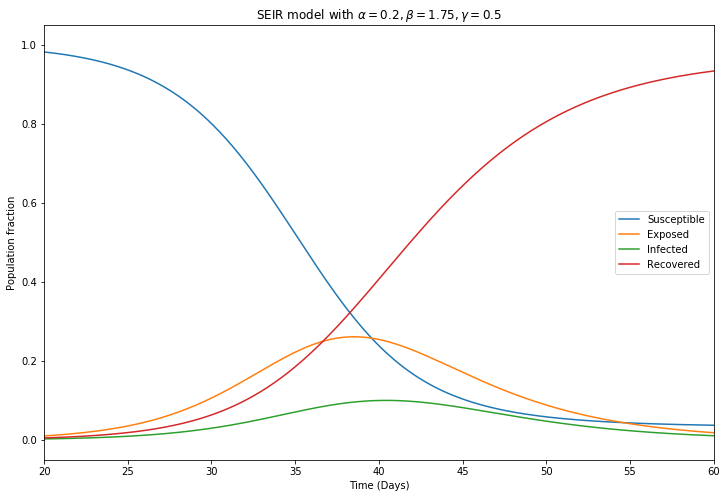

In [42]:
# Run simulation
results_base = base_seir_model(init_vals, params_base, t)

# Plot results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(results_base)
ax.legend(['Susceptible', 'Exposed', 'Infected', 'Recovered'])

ax.set_xlabel('Time (Days)')
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)
ax.set_ylabel('Population fraction')
ax.set_title(r'SEIR model with $\alpha={p[0]}, \beta={p[1]}, \gamma={p[2]}$'.format(p=params_base) )
plt.xlim(200, 600) # 
plt.show()

In [43]:
# peak of Infected
print('Fraction of Infected population = {}'.format(results_base[:,2].max()))
print('Day of peak Infected = {}'.format(results_base[:,2].argmax()/scale_x))

Fraction of Infected population = 0.10024335877116862
Day of peak Infected = 40.4


가정된 인구(1만명)와 매개 변수에 따르면 최소 1명의 감염자에서 최대치가 되는 것은 40일 근방으로 나타나고 인구의 10% 정도가 감염되는 것으로 예측됩니다.

## 사회적 거리 두기 모형의 시뮬레이션

이제 사회적 거리 두기(Soc; Social Distancing)를 할 경우 코로나19의 전염 패턴은 어떻게 되는지 살펴보자. 앞의 기본적인 SEIR 모형에 매개 변수 $\rho = 0.8$가 추가되고 기본 모형과 비교하기 위해서 base 모형과 함께 차트를 그립니다.
이 경우는 20%의 사람들이 사회적 거리 두기를 정확히 하고 있는 것을 가정한 것입니다.  

In [54]:
rho = 0.8 
params_soc = alpha, beta, gamma, rho
# Run simulation
results_soc = seir_model_with_soc_dist(init_vals, params_soc, t)

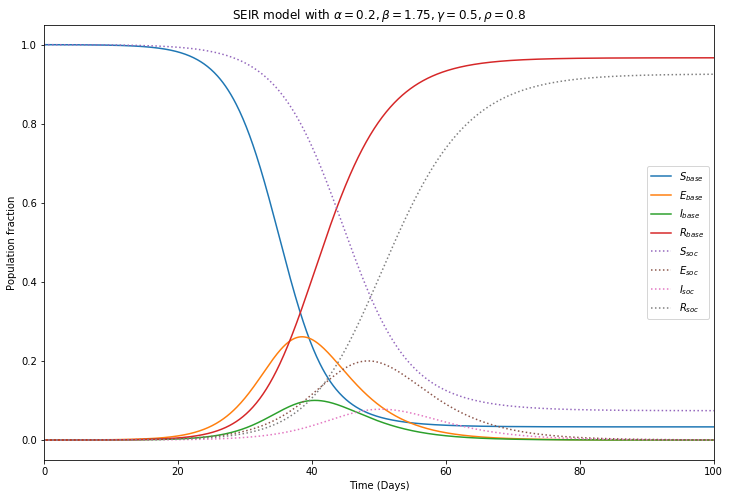

In [57]:
# Plot results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

ax.plot(results_base, linestyle='-')
ax.plot(results_soc,  linestyle=':')
ax.legend(['$S_{base}$', '$E_{base}$', '$I_{base}$', '$R_{base}$',\
           '$S_{soc}$',  '$E_{soc}$',  '$I_{soc}$',  '$R_{soc}$'])

ax.set_xlabel('Time (Days)')
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)

ax.set_ylabel('Population fraction')
ax.set_title(r'SEIR model with $\alpha={p[0]}, \beta={p[1]}, \gamma={p[2]}, \rho={p[3]}$'.format(p=params_soc) )

plt.xlim(0,1000)
plt.show()

Base SEIR 모형(실선)과 사회적 거리두기(soc) 모형(점선)의 결과를 함께 출력하였습니다. 전체적으로 노출과 감염 인구의 비율이 줄고 지연되는 것을 확인할 수 있습니다.

## 사회적 거리 두기의 효과

Base 모형과 비교하여 노출과 감염 인구비율에 주는 영향과 최대 감염자 발생일이 얼마나 늦추어지는지 확인했습니다.

In [11]:
# Drop ratio of Exposed: with soc vs base
r_E = results_soc[:,1].max() / results_base[:,1].max()
# Drop ratio of Infected: with soc vs base
r_I = results_soc[:,2].max() / results_base[:,2].max()
# Delay days of Infected: with soc vs base
d_I = ( results_soc[:,2].argmax() - results_base[:,2].argmax() ) / scale_x

print('Population and COVID-19')
print(r'  N = {}'.format(N))
print(r'  $\alpha$ = {}'.format(alpha))
print(r'  $\beta$ = {}'.format(beta))
print(r'  $\gamma$ = {}'.format(gamma))

print(r'Effect of social distancing: $\rho={}$'.format(rho))
print(r'  Drop ratio of Exposed = {}'.format(1-r_E))
print(r'  Drop ratio of Infected = {}'.format(1-r_I))
print(r'  Delay days of peak infected = {}'.format(d_I))

Population and COVID-19
  N = 10000
  $\alpha$ = 0.2
  $\beta$ = 1.75
  $\gamma$ = 0.5
Effect of social distancing: $\rho=0.8$
  Drop ratio of Exposed = 0.23380988793745305
  Drop ratio of Infected = 0.22279100659793027
  Delay days of peak infected = 9.9


$\rho = 0.8$인 사회적 거리 두기를 할 경우, 인구의 20%가 스스로 격리한 경우에 노출 인구와 감염자를 각각 23%, 22% 정도 줄일 수 있고, 감염자가 최대치가 되는 날을 10일 정도 지연시킬 수 있는 것으로 계산됩니다.

앞서 설명한 것처럼 $\rho$=1인 경우는 사회적 거리 두기를 하지 않은 경우이고, $\rho$가 0인 경우는 각 개인이 완전 격리된 상태를 뜻합니다. 어느 정도의 사회적 거리 두기를 하면 방역에 효과가 있는지 모사해보기 위해서 0~1까지 구간을 나누어 최대 감염자 비율과 감염율 최대일을 얼마나 지연시키는지 확인해보았습니다.

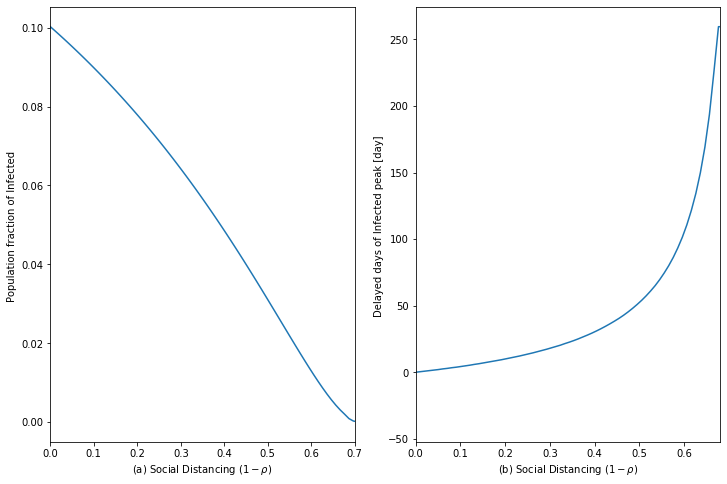

In [93]:
rhos= np.linspace(0, 1, 100)

I_delayed=[]
I_max=[]
I_base_peak_day=results_base[:,2].argmax()

for rho in rhos:
   params_soc = alpha, beta, gamma, rho
   # Run simulation
   results_soc = seir_model_with_soc_dist(init_vals, params_soc, t)
   I_delayed.append((results_soc[:,2].argmax() - I_base_peak_day)/scale_x)
   I_max.append(results_soc[:,2].max())

fig = plt.figure(figsize=(12,8))

plt.subplot(121)
plt.plot(1 - rhos, I_max)
plt.xlabel(r'(a) Social Distancing ($1 - \rho$)')
plt.ylabel(r'Population fraction of Infected ')
plt.xlim(0, 0.7)

plt.subplot(122)
plt.plot(1 - rhos, I_delayed)
plt.xlabel(r'(b) Social Distancing ($1 - \rho$)')
plt.ylabel(r'Delayed days of Infected peak [day] ')
plt.xlim(0, 0.7)
plt.show()

위의 그림은 인구의 약 70%가 사회적 거리 두기에 참여하면 사실상 전염을 막을 수 있고 250일 이상 지연시킬 수 있다는 것을 보여줍니다. 그러나 70% 라는 의미는 학교나 기간 산업이 거의 정지한다는 의미이기도 합니다.

# 고찰

지금까지의 시뮬레이션은 우리나라를 포함한 특정 국가의 통계를 사용하지 않았습니다. 사회적 거리 두기의 상대적 효과를 파악하는 것을 목표로 하고 불필요한 오해와 논쟁을 피하기 위해서입니다.
시뮬레이션 결과에 따른면 20% 정도의 사회적 거리 두기($\rho=0.8$)가 성공해도 방역에는 상당한 효과가 있을 것으로 계산됩니다. 다만 20%로 상정한 것은 60일 이상의 사회적 거리 두기를 실천해야 하므로 강한 사회적 거리 두기를 설정하지 않았습니다.